#Завдання на використання Pandas + SQL

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.3 MB/s eta 0:00:00


In [ ]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [ ]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [ ]:
import pandas as pd

In [ ]:
sql = """
SELECT YEAR(hire_date) AS hire_date, COUNT(*) AS emp_num
FROM employees
GROUP BY YEAR(hire_date)
ORDER BY YEAR(hire_date);
"""

In [ ]:
df = pd.read_sql(sql, con)
print (df)

    hire_date  emp_num
0        1985    35316
1        1986    36150
2        1987    33501
3        1988    31436
4        1989    28394
5        1990    25610
6        1991    22568
7        1992    20402
8        1993    17772
9        1994    14835
10       1995    12115
11       1996     9574
12       1997     6669
13       1998     4155
14       1999     1514
15       2000       13


<ipython-input-35-7a6ff9979774>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [ ]:
import matplotlib.pyplot as plt

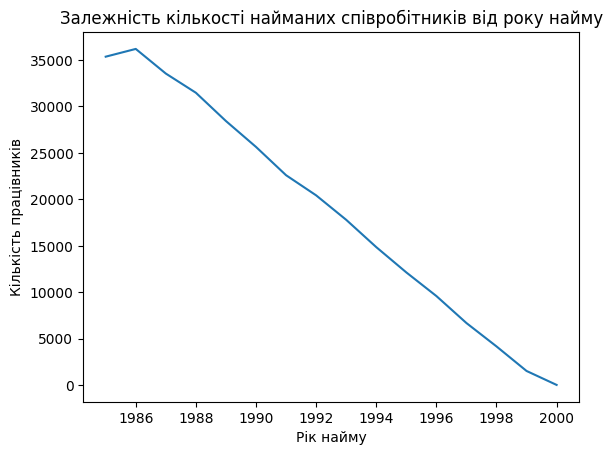

In [ ]:
plt.plot('hire_date', 'emp_num', data=df)
plt.xlabel('Рік найму')
plt.ylabel('Кількість працівників')
plt.title('Залежність кількості найманих співробітників від року найму');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [ ]:
sql_1 = """
SELECT from_date, to_date, TIMESTAMPDIFF(YEAR,from_date,to_date) AS duration
FROM titles
WHERE title = 'Engineer'
  AND to_date != '9999-01-01';
"""
df_years = pd.read_sql(sql_1, con)
print (df_years)


<ipython-input-53-21197f5e317f>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql_1, con)


        from_date     to_date  duration
0      1986-12-01  1995-12-01         9
1      1990-02-18  1995-02-18         5
2      1992-12-18  2000-12-18         8
3      1987-04-03  1995-04-03         8
4      1995-03-20  2001-03-19         5
...           ...         ...       ...
84015  1989-11-23  1998-11-23         9
84016  1989-07-30  1994-07-30         5
84017  1993-02-22  1993-10-27         0
84018  1996-05-13  2002-05-13         6
84019  1987-08-30  1992-08-29         4

[84020 rows x 3 columns]


4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

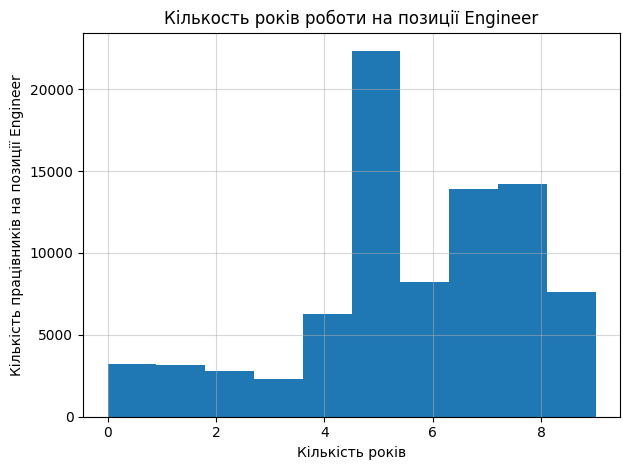

In [ ]:
df_years['duration'].plot.hist(bins=10)
plt.grid(axis='both', alpha=.5)
plt.title('Кількость років роботи на позиції Engineer')
plt.xlabel('Кількість років')
plt.ylabel('Кількість працівників на позиції Engineer')
plt.grid(True)
plt.tight_layout();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()